In [1]:
## Importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

In [2]:
#importing data as dataframe 

user_data=pd.read_csv("/content/takehome_users.csv",sep=',',encoding='latin-1',index_col="object_id")

user_engagement_data=pd.read_csv("/content/takehome_user_engagement.csv")


In [3]:
user_data

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0


In [4]:
user_engagement_data

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [5]:
# check if there is missing  values 
user_data.isnull().sum()

creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [6]:
percent_missing = user_data.isnull().sum() * 100 / len(user_data)
percent_missing

creation_time                  0.000
name                           0.000
email                          0.000
creation_source                0.000
last_session_creation_time    26.475
opted_in_to_mailing_list       0.000
enabled_for_marketing_drip     0.000
org_id                         0.000
invited_by_user_id            46.525
dtype: float64

In [7]:
##drop the columns where 50% or more than 50% values are null 
perc = 50.0
min_count =  int(((100-perc)/100)*user_data.shape[0] + 1)
new_user_data = user_data.dropna( axis=1, thresh=min_count)
new_user_data

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0


In [8]:
##count the no. of times  user visits or logged into the product 

visited_users=user_engagement_data.groupby("user_id").visited.count()
visited_users

user_id
1         1
2        14
3         1
4         1
5         1
         ..
11996     1
11997     1
11998     1
11999     1
12000     1
Name: visited, Length: 8823, dtype: int64

In [9]:
## creating  new column who visited the last 7 days 

df = user_engagement_data.copy()
df['date'] = pd.to_datetime(df['time_stamp'],errors='coerce')


def rolling_count(df_group, frequency):
    return df_group.rolling(frequency, on='date')['user_id'].count()


df['visits_7_days'] = df.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')


In [10]:
df[df.visits_7_days>=3]


,time_stamp,user_id,visited,date,visits_7_days
9,2014-02-09 03:45:04,2,1,2014-02-09 03:45:04,3.0
10,2014-02-13 03:45:04,2,1,2014-02-13 03:45:04,3.0
27,2013-02-19 22:08:03,10,1,2013-02-19 22:08:03,3.0
30,2013-03-02 22:08:03,10,1,2013-03-02 22:08:03,3.0
31,2013-03-05 22:08:03,10,1,2013-03-05 22:08:03,3.0
...,...,...,...,...,...
207898,2014-05-23 11:04:47,11988,1,2014-05-23 11:04:47,6.0
207899,2014-05-24 11:04:47,11988,1,2014-05-24 11:04:47,6.0
207900,2014-05-26 11:04:47,11988,1,2014-05-26 11:04:47,5.0
207901,2014-05-27 11:04:47,11988,1,2014-05-27 11:04:47,5.0


In [11]:
user_adopted = df.groupby('user_id')['visits_7_days'].max().reset_index()
user_adopted

,user_id,visits_7_days
0,1,1.0
1,2,3.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
8818,11996,1.0
8819,11997,1.0
8820,11998,1.0
8821,11999,1.0


In [12]:
user_adopted['adopted_user'] = user_adopted['visits_7_days'].apply(lambda x: 1 if x>=3 else 0)
user_adopted

,user_id,visits_7_days,adopted_user
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0
...,...,...,...
8818,11996,1.0,0
8819,11997,1.0,0
8820,11998,1.0,0
8821,11999,1.0,0


In [13]:
### join the adopted_user column in user_data

user_adopted.drop('visits_7_days', axis = 1, inplace = True)
user_adopted.rename(columns={"user_id": "object_id"}, inplace=True)
user_adopted.set_index("object_id", inplace = True)


adopted_user_data=new_user_data.join(user_adopted,on="object_id",how="left")


In [14]:
adopted_user_data.isnull().sum()

creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                  3177
dtype: int64

In [15]:
##change the format of 'last_session_creation_time' in datetime format (there is 26.47 % values are missing so fill this NaN values with 0  )

adopted_user_data['last_session_creation_time'] = pd.to_datetime(adopted_user_data['last_session_creation_time'] ,unit='s')

adopted_user_data.last_session_creation_time.fillna(0,inplace=True)

##fill the NaN value with 0  in column 'invited_by_user_id'  

adopted_user_data.invited_by_user_id.fillna(0,inplace=True)

## in adopted_user column there is 3177 values are missing means there is no adopted_user so we will fill this values with 0

adopted_user_data.adopted_user.fillna(0,inplace=True)

In [16]:
adopted_user_data

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0.0
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0.0,0.0
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0.0


In [17]:
adopted_user_data.creation_source = new_user_data.creation_source.map({"PERSONAL_PROJECTS":0,"GUEST_INVITE":1,"ORG_INVITE":2,"SIGNUP":3,"SIGNUP_GOOGLE_AUTH":4},na_action='ignore')
adopted_user_data.head()


,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1,2014-04-22 03:53:30,1,0,11,10803.0,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2,2014-03-31 03:45:04,0,0,1,316.0,1.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2,2013-03-19 23:14:52,0,0,94,1525.0,0.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1,2013-05-22 08:09:28,0,0,1,5151.0,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [18]:
adopted_user_data = pd.get_dummies(adopted_user_data, columns=['creation_source'])

In [19]:
adopted_user_data.corr()["adopted_user"]

opted_in_to_mailing_list      0.008097
enabled_for_marketing_drip    0.004653
org_id                        0.064523
invited_by_user_id            0.021596
adopted_user                  1.000000
creation_source_0            -0.075817
creation_source_1             0.045408
creation_source_2            -0.007636
creation_source_3             0.009299
creation_source_4             0.036119
Name: adopted_user, dtype: float64

feature selection (select the top 5 important feature )

In [20]:
x=adopted_user_data[['opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id','creation_source_0','creation_source_1','creation_source_2','creation_source_3','creation_source_4']].values    ## x_feature
y=adopted_user_data['adopted_user'].values 


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

feature selection using RFE method 

In [22]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(x_train, y_train)
list(zip(['opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id','creation_source_0','creation_source_1','creation_source_2','creation_source_3','creation_source_4'],selector.ranking_))

[('opted_in_to_mailing_list', 4),
 ('enabled_for_marketing_drip', 5),
 ('org_id', 6),
 ('invited_by_user_id', 7),
 ('creation_source_0', 3),
 ('creation_source_1', 1),
 ('creation_source_2', 2),
 ('creation_source_3', 1),
 ('creation_source_4', 1)]

feature selection using mutual info method

In [23]:
from sklearn.feature_selection import mutual_info_classif

mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

array([0.00228059, 0.        , 0.00262923, 0.00175701, 0.        ,
       0.00278643, 0.00203816, 0.00011947, 0.00461333])

In [24]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=list(zip(['opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id','creation_source_0','creation_source_1','creation_source_2','creation_source_3','creation_source_4']))
mutual_info.sort_values(ascending=False)

(creation_source_4,)             0.004613
(creation_source_1,)             0.002786
(org_id,)                        0.002629
(opted_in_to_mailing_list,)      0.002281
(creation_source_2,)             0.002038
(invited_by_user_id,)            0.001757
(creation_source_3,)             0.000119
(enabled_for_marketing_drip,)    0.000000
(creation_source_0,)             0.000000
dtype: float64

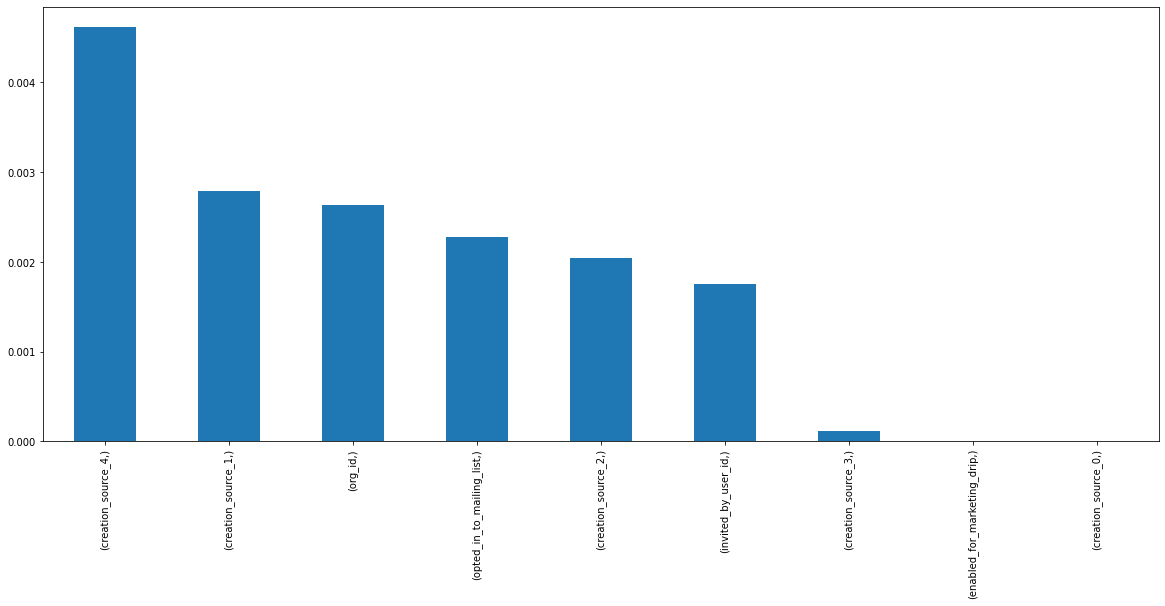

In [25]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

top 5 important feature in data is 

1.   "SIGNUP_GOOGLE_AUTH"
2.   "PERSONAL_PROJECTS"
3.   "org_id"
4.   "SIGNUP"
5.   "invited_by_user_id"








